# Data Storytelling: Technical Audience

This notebook references the __'Data Science Job Salaries'__ dataset sourced from Kaggle, which contains aggregated job postings from ai-jobs.net for the years 2020, 2021, and 2022.

Dataset: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

The aim of this exercise is to communicate a compelling story to a technical audience via EDA. Let's begin by loading in our required libraries and modules.

In [1]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
import seaborn as sns

Next, we will load in the job postings dataset as a DataFrame 'df', as well as a complementary dataset of ISO 3166 country codes to be used for reference later 'countries'. 

In [2]:
df = pd.read_csv('ds_salaries.csv')
countries = pd.read_csv('country_codes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [4]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Here we're double checking for null values. Fortunately, this dataset is clean.

In [5]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
df.rename(columns={'Unnamed: 0': 'emp_id'}, inplace=True)

Let's begin our EDA with a standard __correlation matrix__ to examine the relationships between our numerical quantities. 

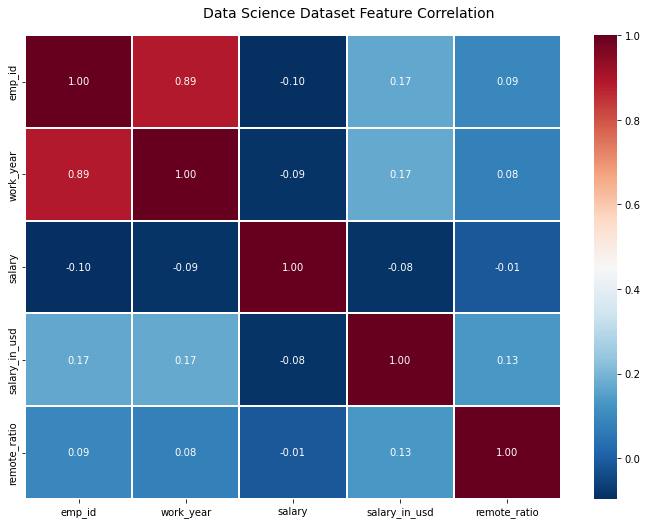

In [7]:
# Correlation heatmap examining correlation of all features in the Dataset
corrmat = df.corr()

f, ax = plt.subplots(figsize=(12, 8))
hm = sns.heatmap(corrmat, annot=True, ax=ax, cmap="RdBu_r",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Data Science Dataset Feature Correlation', fontsize=14)

plt.show()

# Questions Posed

One of the more notable positive correlations here is between __'work_year'__ (ex. 2020, 2021, 2022), and __'salary_in_usd'__ (Pearson correlation = +0.17). 

Let's use this correlation as a starting point from which to examine salary trends within a particular job title of interest to many aspiring data professionals ('Data Scientist'). We will begin by posing our first question: __*are Data Scientist salaries increasing year-over-year?*__ 

And if so: __*how is this trend influenced by experience level, work style (ex. 'Remote', 'Hybrid', 'Office'), and employee location around the world?*__

In [8]:
# convert countries Series to DataFrame
countries = pd.DataFrame(countries)

# re-map country codes from ISO 3166 to country name via left join
country_map = pd.DataFrame({'country_code':df['employee_residence']}).merge(countries,how='left')

# concatenate country names to original DataFrame
df = pd.concat([df, country_map['country']], axis='columns')

# replace long UK name with shorter UK name
long_name = 'United Kingdom of Great Britain and Northern Ireland (the)'
df.replace(to_replace=long_name,value='United Kingdom',inplace=True)

After some data wrangling, we can begin examining aggregate salary trends through grouping operations.

In [9]:
# Aggregate interesting metrics

# get mean salary (USD) by job title
sal_by_title = df.groupby('job_title')['salary_in_usd'].agg(np.mean)

# get mean salary (USD) by employee's country of residence for Data Scientists
ds_sal_by_country = df[df['job_title']=='Data Scientist'].groupby('country')['salary_in_usd'].agg(np.mean)

# get mean salary (USD) by employee's experience level for Data Scientists
ds_sal_by_exp = df[df['job_title']=='Data Scientist'].groupby('experience_level')['salary_in_usd'].agg(np.mean)

# get data professionals residing in US
us_profs = df[df['employee_residence']=='US']

# get data professionals NOT residing in US
world_profs = df[df['employee_residence']!='US']

# get mean salary (USD) by employee's experience level for Data Scientists
ds_sal_by_exp = df[df['job_title']=='Data Scientist'].groupby('experience_level')['salary_in_usd'].agg(np.mean)

# get mean salary (USD) by employee's experience level for US Data Scientists
us_ds_sal_by_exp = us_profs[us_profs['job_title']=='Data Scientist'].groupby('experience_level')['salary_in_usd'].agg(np.mean)

Next, let's get our data into the correct format for plotting.

In [10]:
# convert Series to DataFrame
sal_by_title = pd.DataFrame({'salary_usd':sal_by_title}).reset_index()
sal_by_country = pd.DataFrame({'salary_usd':ds_sal_by_country}).reset_index()
ds_sal_by_exp = pd.DataFrame({'salary_usd':ds_sal_by_exp}).reset_index()
us_ds_sal_by_exp = pd.DataFrame({'salary_usd':us_ds_sal_by_exp}).reset_index()

# sort job titles by salary
sal_by_title = sal_by_title.sort_values(by='salary_usd', ascending=False)

# sort countries by salary for all data job titles
sal_by_country = sal_by_country.sort_values(by='salary_usd', ascending=False)

# sort World+US Data Scientist experience level by salary
ds_sal_by_exp = ds_sal_by_exp.sort_values(by='salary_usd', ascending=False)

# sort US-only Data Scientist experience level by salary
us_ds_sal_by_exp = us_ds_sal_by_exp.sort_values(by='salary_usd', ascending=False)

# get mean Data Scientist salary
mean_ds_sal = np.rint(sal_by_title[sal_by_title['job_title']=='Data Scientist']['salary_usd'].iloc[0])

Finally, let's start answering our first question above by first examining how __worldwide__ Data Industry salaries differ by __job title__.

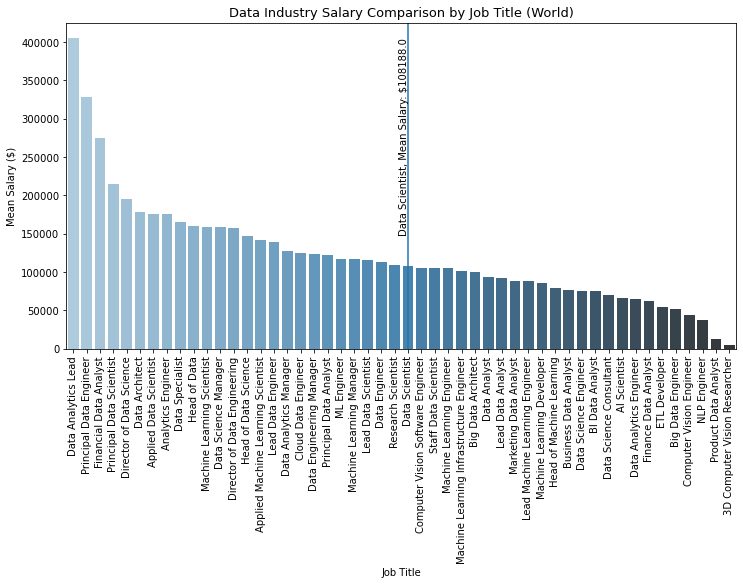

In [11]:
pal = sns.color_palette('Blues_d', len(sal_by_title.job_title))

plt.figure(figsize=(12,6))
sns.barplot(x='job_title',y='salary_usd',data=sal_by_title, palette=pal)

plt.xlabel("Job Title")
plt.xticks(rotation=90)
plt.ylabel("Mean Salary ($)")
plt.title('Data Industry Salary Comparison by Job Title (World)', fontsize=13)
plt.axvline(25)
plt.annotate('Data Scientist, Mean Salary: ${}'.format(mean_ds_sal),
             [24.3, 150000], rotation=90)

plt.show()

We can see that job titles with '*Principal*', '*Director*', or '*Head*' dominate the highest-paying job titles, which is indicative of experience level playing a role in compensation. We will explore the relationship between experience level and salary later.

Let's begin focusing on the '__Data Scientist__' job title and examine how compensation differs by employee country.

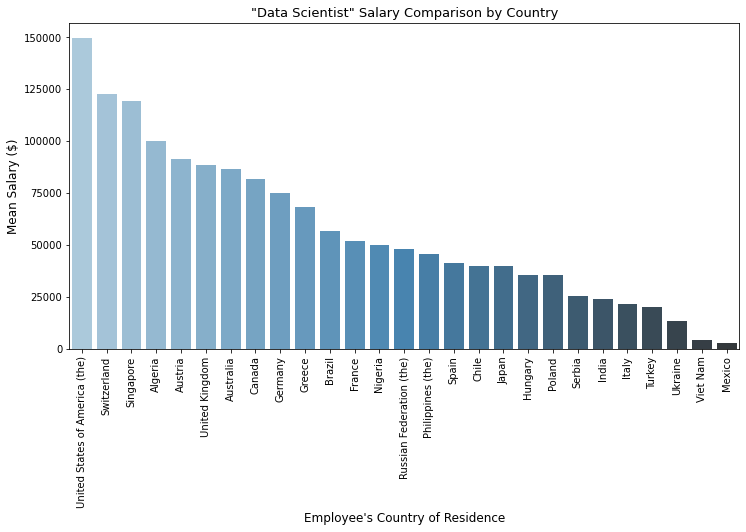

In [12]:
pal = sns.color_palette('Blues_d', len(sal_by_country.country))

plt.figure(figsize=(12,6))
sns.barplot(x='country',y='salary_usd',data=sal_by_country, palette=pal)

plt.xlabel("Employee's Country of Residence", fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Mean Salary ($)', fontsize=12)
plt.yticks(np.arange(0,175000,25000))
plt.title('"Data Scientist" Salary Comparison by Country', fontsize=13)

plt.show()

Interestingly, it appears that posted salaries for 'Data Scientists' in the US are significantly higher than elsewhere in the world. Vietnam and Mexico appear to offer the lowest salaries for 'Data Scientists' globally.

Let's return to examine the link between __experience level__ and __salary__ for 'Data Scientists' in the _US_ as well as _worldwide_ with our next visualization.

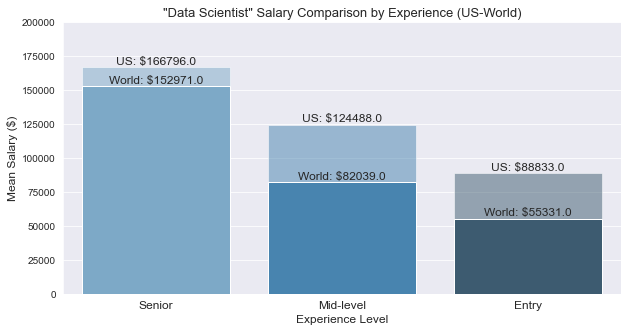

In [23]:
pal = sns.color_palette('Blues_d', len(us_ds_sal_by_exp.experience_level))

plt.figure(figsize=(10,5))

q = sns.barplot(x='experience_level',y='salary_usd',data=us_ds_sal_by_exp, palette=pal, alpha = 0.5)
p = sns.barplot(x='experience_level',y='salary_usd',data=ds_sal_by_exp, palette=pal)

plt.xlabel('Experience Level', fontsize=12)
plt.xticks(fontsize=12)
p.set_xticklabels(['Senior', 'Mid-level', 'Entry'])
plt.ylabel('Mean Salary ($)', fontsize=12)
plt.yticks(np.arange(0,225000,25000))
plt.title('"Data Scientist" Salary Comparison by Experience (US-World)', fontsize=13)

for i in range(0,3):
    plt.annotate('World: ${}'.format(np.rint(ds_sal_by_exp.iloc[i][1])),
             [i, np.rint(np.rint(ds_sal_by_exp.iloc[i][1]))+2000], ha='center',fontsize=12)

for i in range(0,3):
    plt.annotate('US: ${}'.format(np.rint(us_ds_sal_by_exp.iloc[i][1])),
             [i, np.rint(np.rint(us_ds_sal_by_exp.iloc[i][1]))+2000], ha='center',fontsize=12)

plt.show()

Not only does the US compensate 'Data Scientists' better than other countries globally, this trend appears to extend through all experience levels considered by the dataset.

Notably, __mid-level__ and __entry-level__ US-based 'Data Scientists' can expect the most significant increase in salary relative to their foreign counterparts. Howewer, this disparity does not extend as significantly to salaries at the senior level.

Next, let's examine how __workplace location__ (ex. 'Office-Based', 'Hybrid', 'Remote') affects 'Data Scientist' salaries both globably and in the US.

In [14]:
pd.options.mode.chained_assignment = None
df.sort_values(by='experience_level',ascending=False,inplace=True)

us_profs['experience_level'] = us_profs['experience_level'].map({'EN':'US: Entry', 'MI':'US: Mid', 'SE':'US: Senior'})
world_profs['experience_level'] = world_profs['experience_level'].map({'EN':'World: Entry', 'World':'US: Mid', 'SE':'World: Senior'})

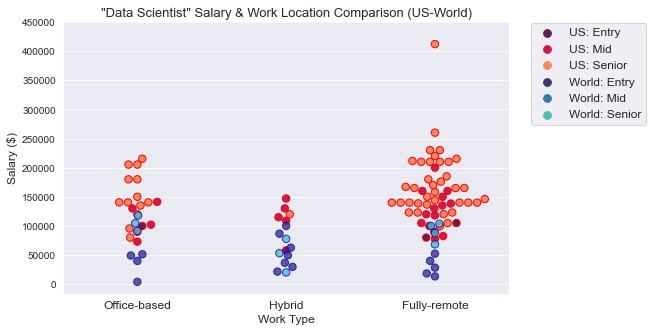

In [24]:
# Visualization: Work Type, Salary, Experience Level

_ = plt.figure(figsize=(8,5))
_ = sns.set_style('darkgrid')
#_ = sns.set_palette('RdBu')
_ = sns.swarmplot(data=us_profs[us_profs['job_title']=='Data Scientist'], x='remote_ratio', y='salary_in_usd', hue='experience_level',
                  hue_order = ['US: Entry', 'US: Mid','US: Senior'], 
                  edgecolor='red',linewidth=1.00, s=7.4, palette='rocket')

_ = sns.swarmplot(data=world_profs[world_profs['job_title']=='Data Scientist'], x='remote_ratio', y='salary_in_usd', hue='experience_level',
                  hue_order = ['World: Entry','World: Mid','World: Senior'], 
                  edgecolor='blue',linewidth=1.00, s=7.4, palette='mako', alpha=0.8)

_ = plt.xlabel('Work Type', fontsize=12)
_ = plt.ylabel('Salary ($)', fontsize=12)
_ = plt.title('"Data Scientist" Salary & Work Location Comparison (US-World)', fontsize=13)
_ = plt.xticks(ticks = (0,1,2), labels=('Office-based', 'Hybrid', 'Fully-remote'), fontsize=12)
_ = plt.yticks(range(0,500000,50000))
_ = plt.legend(bbox_to_anchor=(1.32,1.02), fontsize=12)

_ = sns.despine()
_ = plt.show()

Again, we see that US-based 'Data Scientist' job postings command the highest salaries, however we also see that this trend extends across all workplace locations. 

Notably, there appears to be a significant demand for fully-remote Senior US-based 'Data Scientists' as evidenced by the clustering of salmon points in the 'Fully Remote' swarm.

Now that we've taken some time to explore the data, lets return to the question posed at the beginning of our analysis: 
__*are Data Scientist salaries increasing year-over-year?*__.

To answer this question, we will need to calculate the mean salary offered to 'Data Scientists' by year, but before doing so we should treat the high salary outlier visible in the 'Fully Remote' swarm which will affect our calculation.

In [16]:
# create a DataFrame with only worldwide 'Data Scientist' job postings
ds = df[df['job_title']=='Data Scientist']

# calculate quantiles and inter-quartile range (iqr)
q1 = ds['salary_in_usd'].quantile(0.25)
q3 = ds['salary_in_usd'].quantile(0.75)
iqr = q3 - q1

# establish upper bound using IQR method for outlier detection
upper_bound = q3+(1.5*iqr)

In [17]:
# drop outlier via IQR outlier detection method (drop salary > q3+1.5*iqr)
ds.drop(ds[ds['salary_in_usd'] > upper_bound].index, inplace=True)

# group Data Scientist Salaries by work year (ex. 2020, 2021, 2022)
mean_ds_sal = ds.groupby('work_year')['salary_in_usd'].agg(np.mean)
mean_ds_sal = pd.DataFrame(mean_ds_sal).reset_index()

# show the resulting DataFrame
mean_ds_sal

,work_year,salary_in_usd
0,2020,69669.050000
1,2021,70671.733333
2,2022,136172.090909


Upon cursory inspection of the table above, we can see that 'Data Scientist' salaries are in-fact increasing Year-over-Year, with the greatest increase occuring between 2021-2022.

While aggregate values like those above help identify trends, a histogram is more helpful in visualizing how the salary distibution has changed from 2020-2022.

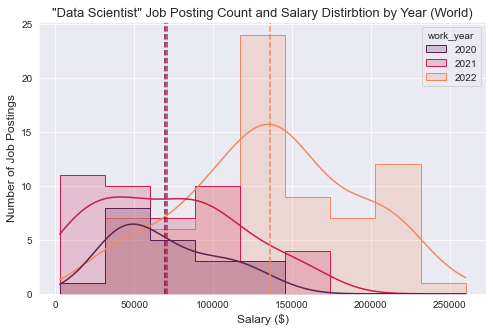

In [26]:
plt.figure(figsize=(8,5))

pal = sns.color_palette('rocket', 3)
sns.histplot(data=ds, x="salary_in_usd", hue="work_year", kde=True, common_norm=False, palette=pal, alpha = 0.2, element='step')

for i in range(0,3):
    plt.axvline(mean_ds_sal['salary_in_usd'][i], c=pal[i], linestyle='--')

_ = plt.xlabel('Salary ($)', fontsize=12)
_ = plt.xticks(np.arange(0,300000, 50000))
_ = plt.ylabel('Number of Job Postings', fontsize=12)
_ = plt.title('"Data Scientist" Job Posting Count and Salary Distirbtion by Year (World)', fontsize=13)

plt.show()

It appears that the most significant increase in mean 'Data Scientist' salary came in 2022. This increase is accompanied by an jump in the number of job postings within the $125k-$150k range.

This finding brings us to our second question posed at the beginning of this analysis: _(regarding changes in 'Data Scientist' compensation over time)_:  __*how is this trend influenced by experience level, work style (ex. 'Remote', 'Hybrid', 'Office'), and employee location around the world?*__

Since we've already discussed work style, and employee location effects on salary, let's examine why Data Scientist salaries might be __increasing__ as a result of __fluctuations in experience level__ on job postings. 

We can explore this by plotting a simple timeseries of the number of job postings by year for each experience level.

In [ ]:
ds_exp_year = df.groupby('work_year')['experience_level'].value_counts()

In [20]:
ds_exp_year = pd.DataFrame({'count':ds_exp_year}).reset_index()

In [21]:
exp_levels = ['EN', 'MI', 'SE', 'EX']
years = ds_exp_year['work_year'].unique()

ds_en = ds_exp_year[ds_exp_year['experience_level']=='EN']['count'].to_list()
ds_mi = ds_exp_year[ds_exp_year['experience_level']=='MI']['count'].to_list()
ds_se = ds_exp_year[ds_exp_year['experience_level']=='SE']['count'].to_list()
ds_ex = ds_exp_year[ds_exp_year['experience_level']=='EX']['count'].to_list()

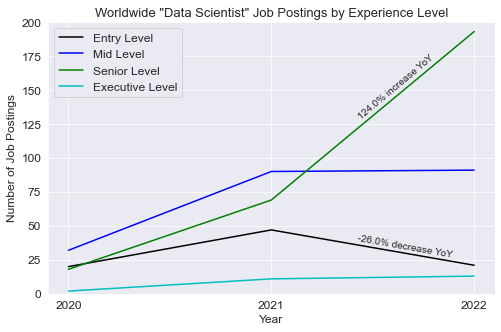

In [27]:
plt.figure(figsize=(8,5))

plt.plot(years, ds_en, color='k', label='Entry Level')
plt.plot(years, ds_mi, color='b', label='Mid Level')
plt.plot(years, ds_se, color='g', label='Senior Level')
plt.plot(years, ds_ex, color='c', label='Executive Level')

plt.legend(fontsize=12)
plt.title('Worldwide "Data Scientist" Job Postings by Experience Level', fontsize=13)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)

plt.annotate('{}% increase YoY'.format(((ds_se[2]-ds_se[1])/100)*100), [2021.42,ds_se[2]-64], rotation=40)
plt.annotate('{}% decrease YoY'.format(((ds_en[2]-ds_en[1])/100)*100), [2021.42,ds_en[2]+6], rotation=-10)


plt.ylim([0, 200])
plt.xticks([2020, 2021, 2022], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

As shown above, we can see that the increase in posted 'Data Scientist' salaries between the years 2021-2022 can likely be attributed to a significant increase in the number of higher-paying __senior level__ job postings (+124% YoY). In addition, there was a decrease in the number of lower-paying __entry level__ job posings (-26% YoY) in the same period.

It seems to be an excellent time to be a US-based Senior 'Data Scientist'.

# Conclusions

Let's restate the questions posed at the beginning of this analysis and provide answers according to our analysis:

(A): __*are Data Scientist salaries increasing year-over-year?*__ 

We have shown that worldwide 'Data Scientist' salaries (as advertised on job postings within the dataset examined), are increasing year over year, with the largest increase in mean salary occuring between 2021-2022.

(B): __*how is this trend influenced by experience level, work style (ex. 'Remote', 'Hybrid', 'Office'), and employee location around the world?*__

We can attribute the majority of the increase in 'Data Scientist' salaries between 2021-2022 to a +124% increase in higher-paying Senior-level 'Data Scientist' job postings, which was accompanied by a -24% decrease in lower-paying Entry-level postings.

Furthermore, we can state that a 'Data Scientists' experience level has a strong influence on salary, with more experience commanding a higher salary both globally, and in the US. In addition, Entry-level or Mid-level 'Data Scientists' in the US have much higher salaries than their foreign counterparts. 

With regard to employee location, US-based 'Data Scientists' have higher salaries than those working from other countries on average.

While most 'Data Scientists' appear to work remotely, there doesn't appear to be a significant difference in salary offered to 'Fully-remote' vs. 'Office-based' workers.